In [ ]:
! pwd

/content


In [ ]:
! git clone https://github.com/joshuaaduarte/categorize_ethnicity.git

Cloning into 'categorize_ethnicity'...
remote: Enumerating objects: 97645, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 97645 (delta 4), reused 25 (delta 4), pack-reused 97620
Receiving objects: 100% (97645/97645), 537.43 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (115707/115707), done.


In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# change the paths with respect to the local computer path for Josh
IMAGE_SIZE = [224,224]
train_path = "/content/categorize_ethnicity/train_raw"
test_path = "/content/categorize_ethnicity/val_raw"

In [ ]:
folders = glob('/content/categorize_ethnicity/train_raw/*')

In [ ]:
folders

['/content/categorize_ethnicity/train_raw/Latino_Hispanic',
 '/content/categorize_ethnicity/train_raw/White',
 '/content/categorize_ethnicity/train_raw/Middle Eastern',
 '/content/categorize_ethnicity/train_raw/Black',
 '/content/categorize_ethnicity/train_raw/East Asian',
 '/content/categorize_ethnicity/train_raw/Indian',
 '/content/categorize_ethnicity/train_raw/Southeast Asian']

In [ ]:
len(folders)

7

In [ ]:
IMG_SIZE = 224
CHANNELS = 3
NUM_CLASSES = 7
BATCH_SIZE = 32

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Activation
VGGFace = Sequential()

VGGFace.add(ZeroPadding2D(input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS)))
VGGFace.add(Conv2D(64, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(64, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(128, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(128, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(256, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(ZeroPadding2D())
VGGFace.add(Conv2D(512, (3, 3), activation = 'relu'))
VGGFace.add(MaxPooling2D((2, 2), strides = 2))

VGGFace.add(Conv2D(4096, (7, 7), activation = 'relu'))
VGGFace.add(Dropout(0.5))

VGGFace.add(Conv2D(4096, (1, 1), activation = 'relu'))
VGGFace.add(Dropout(0.5))

VGGFace.add(Conv2D(2622, (1, 1)))
VGGFace.add(Flatten())
VGGFace.add(Activation('softmax'))

VGGFace.load_weights('/content/gdrive/MyDrive/DataScience_Project/categorize_ethnicity/vgg_face_weights.h5')

VGGFace.pop()
VGGFace.pop()
VGGFace.pop()

model = Sequential()

model.add(VGGFace)
model.add(Conv2D(NUM_CLASSES, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

model.layers[0].trainable = False



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1, 1, 4096)        134260544 
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 1, 7)           28679     
                                                                 
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 activation_1 (Activation)   (None, 7)                 0         
                                                                 
Total params: 134,289,223
Trainable params: 28,679
Non-trainable params: 134,260,544
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# opt = Adam
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 
                                                 class_mode = 'categorical')

Found 86744 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            
                                            class_mode = 'categorical')

Found 10954 images belonging to 7 classes.


In [ ]:
early_stop = EarlyStopping(patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1, min_lr=0.0001)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
  callbacks = [early_stop, reduce_lr]
)

Epoch 1/10
85/85 [==============================] - 54s 478ms/step - loss: 1.8868 - accuracy: 0.2971 - val_loss: 1.8362 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/10
85/85 [==============================] - 40s 464ms/step - loss: 1.7918 - accuracy: 0.3710 - val_loss: 1.7663 - val_accuracy: 0.3949 - lr: 0.0010
Epoch 3/10
85/85 [==============================] - 40s 473ms/step - loss: 1.7068 - accuracy: 0.4471 - val_loss: 1.6736 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 4/10
85/85 [==============================] - 40s 472ms/step - loss: 1.6549 - accuracy: 0.4533 - val_loss: 1.6204 - val_accuracy: 0.4972 - lr: 0.0010
Epoch 5/10
85/85 [==============================] - 40s 472ms/step - loss: 1.6053 - accuracy: 0.4743 - val_loss: 1.6111 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 6/10
85/85 [==============================] - 40s 469ms/step - loss: 1.5590 - accuracy: 0.4812 - val_loss: 1.5374 - val_accuracy: 0.5028 - lr: 0.0010
Epoch 7/10
85/85 [==============================] - 39s 452ms/st

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
  callbacks = [reduce_lr]
)


Epoch 1/50
85/85 [==============================] - 40s 470ms/step - loss: 1.3142 - accuracy: 0.5375 - val_loss: 1.2876 - val_accuracy: 0.5710 - lr: 1.0000e-04
Epoch 2/50
85/85 [==============================] - 39s 459ms/step - loss: 1.2990 - accuracy: 0.5566 - val_loss: 1.3684 - val_accuracy: 0.5341 - lr: 1.0000e-04
Epoch 3/50
85/85 [==============================] - 39s 458ms/step - loss: 1.3228 - accuracy: 0.5324 - val_loss: 1.3288 - val_accuracy: 0.5540 - lr: 1.0000e-04
Epoch 4/50
85/85 [==============================] - 39s 457ms/step - loss: 1.3386 - accuracy: 0.5265 - val_loss: 1.3210 - val_accuracy: 0.5398 - lr: 1.0000e-04
Epoch 5/50
85/85 [==============================] - 38s 451ms/step - loss: 1.3380 - accuracy: 0.5191 - val_loss: 1.3652 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 6/50
85/85 [==============================] - 39s 455ms/step - loss: 1.3195 - accuracy: 0.5404 - val_loss: 1.3132 - val_accuracy: 0.5540 - lr: 1.0000e-04
Epoch 7/50
85/85 [======================

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1
)

Epoch 1/50
14/14 [==============================] - 7s 489ms/step - loss: 1.7005 - accuracy: 0.5045 - val_loss: 1.7098 - val_accuracy: 0.4531
Epoch 2/50
14/14 [==============================] - 8s 545ms/step - loss: 1.7113 - accuracy: 0.4888 - val_loss: 1.7583 - val_accuracy: 0.4219
Epoch 3/50
14/14 [==============================] - 8s 554ms/step - loss: 1.7015 - accuracy: 0.5000 - val_loss: 1.7184 - val_accuracy: 0.5156
Epoch 4/50
14/14 [==============================] - 7s 477ms/step - loss: 1.7033 - accuracy: 0.4799 - val_loss: 1.7324 - val_accuracy: 0.4844
Epoch 5/50
14/14 [==============================] - 9s 620ms/step - loss: 1.6630 - accuracy: 0.5134 - val_loss: 1.6830 - val_accuracy: 0.4922
Epoch 6/50
14/14 [==============================] - 7s 482ms/step - loss: 1.6769 - accuracy: 0.5179 - val_loss: 1.6560 - val_accuracy: 0.5625
Epoch 7/50
14/14 [==============================] - 11s 769ms/step - loss: 1.6521 - accuracy: 0.4911 - val_loss: 1.6821 - val_accuracy: 0.4609
Epoch

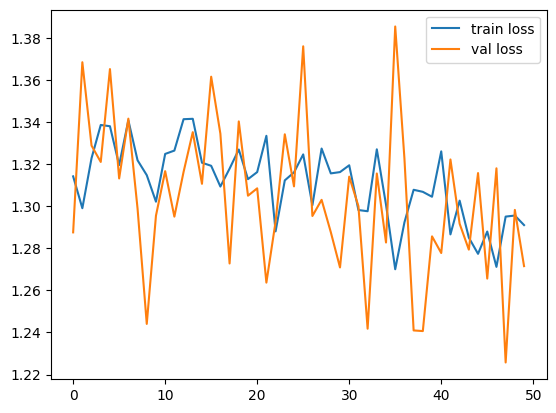

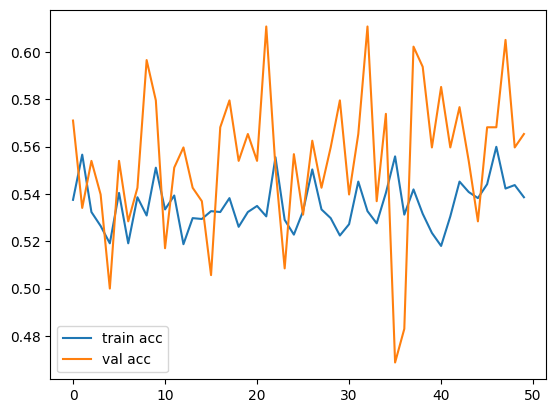

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

In [ ]:
! mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
# change the paths with respect to the local computer path for Josh
! mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
! cd  /content/gdrive/MyDrive/DataScience_Project/modelweights

/content/gdrive/MyDrive/DataScience_Project3


In [ ]:
! pwd

'/content/gdrive/MyDrive/DataScience_Project3'

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_vggface50raw.h5')